In [2]:
import numpy
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import cv2
from sklearn.model_selection import train_test_split

In [7]:
import xml.etree.ElementTree as ET
seed = 7
numpy.random.seed(seed)
size = (100, 100)
images = []
annotations = []
pos=[]
posplate = []
image_dir = r'C:\Users\kshruth\Documents\automated parking\UFPR-ALPR dataset\training'
folder_dir = os.listdir(image_dir)
print(folder_dir)

for file in folder_dir:
    path = os.path.join(image_dir,file)
    files = os.listdir(path)
    for each_file in files:
        imagepath = os.path.join(path,each_file)
        if imagepath.endswith('.png'):
            img = cv2.imread(imagepath)
            height, width, channels = img.shape
            img = cv2.resize(img,size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
            
            y_scale = 100/height
            x_scale = 100/width
        elif imagepath.endswith('.txt'):
            with open(imagepath, "r") as file: 
                data = file.readlines()
                elements = []
                for line in data: 
                    word = line.split() 
                    elements.append(word)
                l = len(elements)
            for i in range(0,l):
                if(elements[i][0]=='position_vehicle:'):
                    position = []
                    for j in range(1,5):
                        if(j==1 or j==3):
                            position.append(x_scale*int(elements[i][j]))
                        elif(j==2 or j==4):
                            position.append(y_scale*int(elements[i][j]))
                    
                if(elements[i][0]=='position_plate:'):
                    position1 = []
                    for j in range(1,5):
                        if(j==1 or j==3):
                            position1.append(x_scale*int(elements[i][j]))
                        elif(j==2 or j==4):
                            position1.append(y_scale*int(elements[i][j]))
            pos.append(position)
            posplate.append(position1)
print(pos)
print(posplate)
print(len(pos))
print(len(images))
print(len(posplate))
    


['track0001', 'track0002', 'track0003', 'track0004', 'track0005', 'track0006', 'track0007', 'track0008', 'track0009', 'track0010', 'track0011', 'track0012', 'track0013', 'track0014', 'track0015', 'track0016', 'track0017', 'track0018', 'track0019', 'track0020', 'track0021', 'track0022', 'track0023', 'track0024', 'track0025', 'track0026', 'track0027', 'track0028', 'track0029', 'track0030', 'track0031', 'track0032', 'track0033', 'track0034', 'track0035', 'track0036', 'track0037', 'track0038', 'track0039', 'track0040', 'track0041', 'track0042', 'track0043', 'track0044', 'track0045', 'track0046', 'track0047', 'track0048', 'track0049', 'track0050', 'track0051', 'track0052', 'track0053', 'track0054', 'track0055', 'track0056', 'track0057', 'track0058', 'track0059', 'track0060', 'track0061', 'track0062', 'track0063', 'track0064', 'track0065', 'track0066', 'track0067', 'track0068', 'track0069', 'track0070', 'track0071', 'track0072', 'track0073', 'track0074', 'track0075', 'track0076', 'track0077'

In [4]:
#f = open("C:/Users/kshruth/Documents/automated parking/UFPR-ALPR dataset/training/track0060/track0060[28].txt")
img = cv2.imread("C:/Users/kshruth/Documents/automated parking/UFPR-ALPR dataset/training/track0060/track0060[28].png")
height, width, channels = img.shape
img = cv2.resize(img,size)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


print(height)
print(width)
y_scale = 100/height
x_scale = 100/width
print(x_scale)
print(y_scale)
pos = []
with open("C:/Users/kshruth/Documents/automated parking/UFPR-ALPR dataset/training/track0060/track0060[28].txt", "r") as file: 
    data = file.readlines()
    elements = []
    for line in data: 
        word = line.split() 
        elements.append(word)
    print(elements)
l = len(elements)
for i in range(0,l):
    if(elements[i][0]=='position_vehicle:'):
        position = []
        for j in range(1,5):
            position.append(x_scale*int(elements[i][j]))
pos.append(position)
print(pos)

1080
1920
0.052083333333333336
0.09259259259259259
[['camera:', 'iPhone', '7', 'Plus'], ['position_vehicle:', '190', '0', '950', '570'], ['type:', 'car'], ['make:', 'Mercedes-Benz'], ['model:', 'OF-1418', 'Neobus', 'Mega'], ['year:', '2007'], ['plate:', 'APB-4327'], ['position_plate:', '808', '347', '105', '37'], ['char', '1:', '814', '359', '13', '20'], ['char', '2:', '826', '359', '12', '20'], ['char', '3:', '838', '360', '12', '19'], ['char', '4:', '857', '361', '12', '19'], ['char', '5:', '869', '361', '12', '19'], ['char', '6:', '881', '361', '13', '19'], ['char', '7:', '893', '361', '12', '19']]
[[9.895833333333334, 0.0, 49.47916666666667, 29.6875]]


In [8]:
def cross_validate(xs,ys):
    X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size = 0, random_state = 0)
    return X_train,X_test, y_train, y_test
images = numpy.array(images)
pos = numpy.array(pos)

X_train, X_test, y_train, y_test = cross_validate(images, pos)
x_train, x_test, z_train, z_test = cross_validate(images, posplate)  
print(len(images))
print(len(pos))
print(len(posplate))

4410
4410
4410


In [9]:
X_train=numpy.array(X_train).astype('float32')
X_test =numpy.array(X_test).astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

X_train_mean = numpy.mean(X_train, axis = 0)
print(X_train.shape[1:])
nRows, nCols = X_train.shape[1:]

x_train=numpy.array(x_train).astype('float32')
x_test =numpy.array(x_test).astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

x_train_mean = numpy.mean(x_train, axis = 0)
print(x_train.shape[1:])
nRows1, nCols1 = x_train.shape[1:]

(100, 100)
(100, 100)


In [10]:
from keras import backend as K
K.set_image_dim_ordering('tf')
nDims = 1
X_train = X_train.reshape(X_train.shape[0], nRows, nCols, nDims)
X_test = X_test.reshape(X_test.shape[0], nRows, nCols, nDims)
x_train = x_train.reshape(x_train.shape[0], nRows1, nCols1, nDims)
x_test = x_test.reshape(x_test.shape[0], nRows1, nCols1, nDims)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100,100,1)))
#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(100,100,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))


#sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, batch_size=16, epochs=6,verbose=1, validation_split=0.1)


m = model.evaluate(X_test, y_test)


Train on 3969 samples, validate on 441 samples
Epoch 1/6
3969/3969 [==============================] - 335s 84ms/step - loss: 154.7286 - acc: 0.5563 - val_loss: 62.2848 - val_acc: 0.7642
Epoch 2/6
3969/3969 [==============================] - 350s 88ms/step - loss: 60.4297 - acc: 0.7717 - val_loss: 34.7090 - val_acc: 0.8571
Epoch 3/6
3969/3969 [==============================] - 352s 89ms/step - loss: 42.7266 - acc: 0.8377 - val_loss: 32.5236 - val_acc: 0.8889
Epoch 4/6
3969/3969 [==============================] - 344s 87ms/step - loss: 36.0090 - acc: 0.8622 - val_loss: 9.6262 - val_acc: 0.9297
Epoch 5/6
3969/3969 [==============================] - 343s 86ms/step - loss: 32.1915 - acc: 0.8735 - val_loss: 18.7769 - val_acc: 0.9184
Epoch 6/6
3969/3969 [==============================] - 339s 85ms/step - loss: 31.5648 - acc: 0.8806 - val_loss: 8.8367 - val_acc: 0.9478


In [11]:

print(posplate)
posplate = numpy.array(posplate)
#x_train, x_test, z_train, z_test = cross_validate(images, posplate)  
images = numpy.array(images)
posplate = numpy.array(posplate)

M_train, M_test, N_train, N_test = cross_validate(images, posplate)
print(len(images))
print(len(posplate))
print(M_train[0])

test = []
test.append(M_train[0])

M_train=numpy.array(M_train).astype('float32')
M_test =numpy.array(M_test).astype('float32')
test =numpy.array(test).astype('float32')
M_train = M_train/255.0
M_test = M_test/255.0
test = test/255.0 
M_train_mean = numpy.mean(M_train, axis = 0)
print(M_train.shape[1:])
nRows, nCols = M_train.shape[1:]

[[47.44791666666667, 48.61111111111111, 3.8020833333333335, 2.685185185185185], [47.708333333333336, 48.51851851851852, 3.75, 2.5925925925925926], [47.91666666666667, 48.33333333333333, 3.854166666666667, 2.5925925925925926], [48.28125, 48.148148148148145, 3.697916666666667, 2.685185185185185], [48.54166666666667, 48.05555555555555, 3.697916666666667, 2.685185185185185], [48.75, 48.24074074074074, 3.6458333333333335, 2.5925925925925926], [49.0625, 48.33333333333333, 3.59375, 2.5925925925925926], [49.32291666666667, 48.61111111111111, 3.59375, 2.5], [49.63541666666667, 48.98148148148148, 3.59375, 2.314814814814815], [50.0, 48.888888888888886, 3.4895833333333335, 2.5925925925925926], [50.364583333333336, 49.07407407407407, 3.4895833333333335, 2.5], [50.72916666666667, 49.07407407407407, 3.4375, 2.5], [51.145833333333336, 48.98148148148148, 3.385416666666667, 2.5], [51.51041666666667, 48.98148148148148, 3.4375, 2.4074074074074074], [51.97916666666667, 48.98148148148148, 3.385416666666667,

(100, 100)


In [12]:
from keras import backend as K
K.set_image_dim_ordering('tf')
nDims = 1
M_train = M_train.reshape(M_train.shape[0], nRows, nCols, nDims)
M_test = M_test.reshape(M_test.shape[0], nRows, nCols, nDims)

modelplate = Sequential()
modelplate.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100,100,1)))
#modelplate.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
#modelplate.add(MaxPooling2D(pool_size=(2, 2)))
#modelplate.add(Dropout(0.25))
#modelplate.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelplate.add(Conv2D(64, (3, 3), activation='relu', input_shape=(100,100,1)))
modelplate.add(MaxPooling2D(pool_size=(2, 2)))
modelplate.add(Dropout(0.25))

modelplate.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelplate.add(Conv2D(64, (3, 3), activation='relu'))
modelplate.add(MaxPooling2D(pool_size=(2, 2)))
modelplate.add(Dropout(0.25))

modelplate.add(Flatten())
modelplate.add(Dense(512, activation='relu'))
modelplate.add(Dropout(0.5))
modelplate.add(Dense(4, activation='relu'))


#sgd = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)


modelplate.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


historyplate = modelplate.fit(M_train, N_train, batch_size=16, epochs=6,verbose=1, validation_split=0.1)

m = modelplate.evaluate(M_test, N_test)

Train on 3969 samples, validate on 441 samples
Epoch 1/6
3969/3969 [==============================] - 320s 81ms/step - loss: 135.0365 - acc: 0.6402 - val_loss: 117.1292 - val_acc: 0.6735
Epoch 2/6
3969/3969 [==============================] - 328s 83ms/step - loss: 87.0806 - acc: 0.6891 - val_loss: 101.5077 - val_acc: 0.7256
Epoch 3/6
3969/3969 [==============================] - 322s 81ms/step - loss: 46.0962 - acc: 0.7856 - val_loss: 28.2814 - val_acc: 0.8254
Epoch 4/6
3969/3969 [==============================] - 350s 88ms/step - loss: 32.2005 - acc: 0.8473 - val_loss: 29.9059 - val_acc: 0.8503
Epoch 5/6
3969/3969 [==============================] - 325s 82ms/step - loss: 28.7342 - acc: 0.8677 - val_loss: 11.6018 - val_acc: 0.8685
Epoch 6/6
3969/3969 [==============================] - 316s 80ms/step - loss: 23.8738 - acc: 0.8977 - val_loss: 31.4879 - val_acc: 0.9274


In [31]:
testimage = []
test ="C:/Users/kshruth/Documents/automated parking/implemetation/bike_testhp/15.jpg" 
img = cv2.imread(test)
height, width, channels = img.shape
img = cv2.resize(img,size)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
testimage.append(img)

y_scale = 100/height
x_scale = 100/width
testimage = numpy.array(testimage)
M_test =numpy.array(testimage).astype('float32')
M_test = M_test/255.0
nDims = 1
M_test = M_test.reshape(M_test.shape[0], nRows, nCols, nDims)
predit1 = modelplate.predict(M_test)
print(predit1)
predit1[0][0] = predit1[0][0]/x_scale
predit1[0][1] = predit1[0][1]/y_scale
predit1[0][2] = predit1[0][2]/x_scale
predit1[0][3] = predit1[0][3]/y_scale
print(predit1)

[[40.67627   48.28341    5.0921907  3.328781 ]]
[[353.88354  560.0875    44.30206   38.613857]]


In [32]:

testimage1 = []
test1 ="C:/Users/kshruth/Documents/automated parking/implemetation/bike_testhp/15.jpg" 
img1 = cv2.imread(test1)
height1, width1, channels = img1.shape
img1 = cv2.resize(img1,size)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
testimage1.append(img1)

y_scale1 = 100/height1
x_scale1 = 100/width1
testimage1 = numpy.array(testimage1)
X_test1 =numpy.array(testimage1).astype('float32')
X_test1 = X_test1/255.0
nDims = 1
X_test1 = X_test1.reshape(X_test1.shape[0], nRows, nCols, nDims)
predit1 = model.predict(X_test1)
print(predit1)
predit1[0][0] = predit1[0][0]/x_scale1
predit1[0][1] = predit1[0][1]/y_scale1
predit1[0][2] = predit1[0][2]/x_scale1
predit1[0][3] = predit1[0][3]/y_scale1
print(predit1)

[[34.20473  22.186832 26.613491 38.418243]]
[[297.58115 257.36725 231.53737 445.6516 ]]


In [28]:

i=0
p = [[623, 452, 407, 349]]
im = cv2.imread(test,cv2.IMREAD_COLOR)
height, weight, channels = im.shape
cv2.rectangle(im,(predit[i][0],predit[i][1]),(predit[i][2],predit[i][3]),(0,0,255),5)
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', 600,600)
cv2.imshow('image',im)
cv2.waitKey()

cv2.destroyAllWindows()

NameError: name 'predit' is not defined

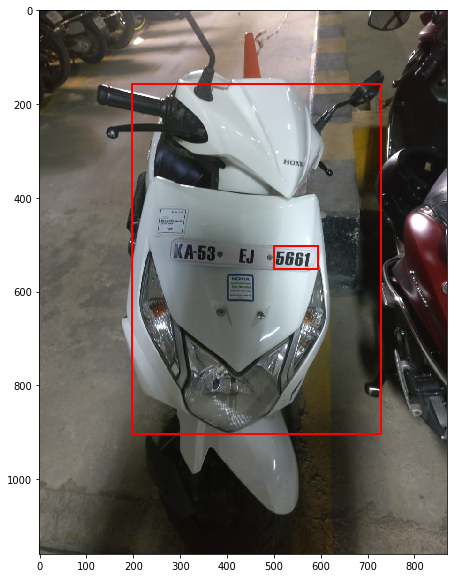

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
im = np.array(Image.open('C:/Users/kshruth/Documents/automated parking/implemetation/bike_testhp/15.jpg'), dtype=np.uint8)
# Create figure and axes
fig,ax = plt.subplots(1,figsize=(10,10))

# Display the image
ax.imshow(im)
# Create a Rectangle patch
rect = patches.Rectangle((197.58115, 157.36725), 531.53737, 745.6516,linewidth=2,edgecolor='r',facecolor='none')
rect1 = patches.Rectangle((500.88354, 503.0875), 94.30206, 48.613857 ,linewidth=2,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect1)

plt.show()

In [56]:
p = [[421, 301, 334, 510]]
i=0
im = cv2.imread('C:/Users/kshruth/Documents/automated parking/UFPR-ALPR dataset/validation/track0067/track0067[01].png')
height, weight, channels = im.shape
cv2.rectangle(im,(p[i][0],p[i][1]),(p[i][2],p[i][3]),(0,0,255),5)
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', height,weight)
cv2.imshow('image',im)
cv2.waitKey()
cv2.destroyAllWindows()

In [57]:
im = cv2.imread('C:/Users/kshruth/Documents/automated parking/implemetation/bike_testhp/15.jpg')
crop_im = im[500:500+48,503:503+94]
cv2.imshow("cropped", crop_im)
cv2.waitKey(0)
cv2.imwrite("C:/Users/kshruth/Pictures/new.jpg",crop_im)


True

In [54]:
from PIL import Image
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
im = cv2.imread('C:/Users/kshruth/Pictures/new.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray',gray)
cv2.waitKey(0)
text = pytesseract.image_to_string(gray)
print(text)

566]


In [58]:
from PIL import Image
black = (0,0,0)
white = (255,255,255)
threshold = (100,100,100)
# Open input image in grayscale mode and get its pixels.
img = Image.open("C:/Users/kshruth/Pictures/new.jpg").convert("LA")
pixels = img.getdata()
newPixels = []
# Compare each pixel 
for pixel in pixels:
    if pixel < threshold:
        newPixels.append(black)
    else:
        newPixels.append(white)

# Create and save new image.
newImg = Image.new("RGB",img.size)
newImg.putdata(newPixels)
newImg.save("newImage.jpg")

In [59]:
from PIL import Image
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
im = cv2.imread('C:/Users/kshruth/Pictures/download1.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray',gray)
cv2.waitKey(0)
text = pytesseract.image_to_string(gray)
print(text)

DL 7C0 1939
